<a href="https://colab.research.google.com/github/yashmith-r/Sales-Prediction-/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libs & Loading dataset

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("advertising_sales_data.xlsx")
print(df.head(10))

  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9
5    camp6    8.7   48.9       75.0    7.2
6    camp7   57.5   32.8       23.5   11.8
7    camp8  120.2   19.6       11.6   13.2
8    camp9    8.6    2.1        1.0    4.8
9   camp10  199.8    2.6       21.2   15.6


Data Preprocessing

In [93]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  198.000000  200.000000  200.000000
mean   147.042500   23.260606   30.554000   15.130500
std     85.854236   14.921914   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.925000   12.750000   11.000000
50%    149.750000   22.400000   25.750000   16.000000
75%    218.825000   36.575000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


Handling MissingValues

In [94]:
print(df.isnull().sum())

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


Checking the missing values are completely at random

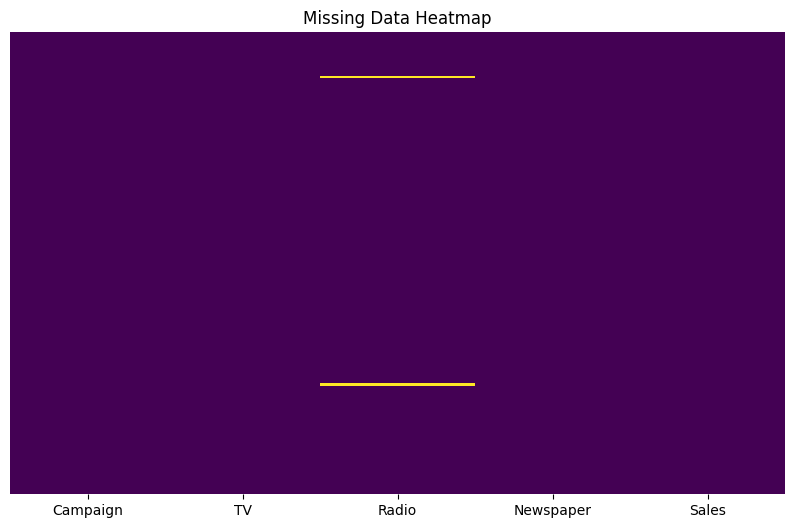

In [95]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

In [96]:
from scipy import stats

missing_radio_sales = df[df['Radio'].isnull()]['Sales']
non_missing_radio_sales = df[df['Radio'].notnull()]['Sales']
t_stat, p_value = stats.ttest_ind(missing_radio_sales, non_missing_radio_sales, nan_policy='omit')
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 0.12598026168606555, P-value: 0.8998753783340786


Since the missing data is completely at random we can drop the missing data

In [97]:
df = df.dropna(subset=['Radio'])
print(df.isnull().sum())
print(df.info())

Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   198 non-null    object 
 1   TV         198 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  198 non-null    float64
 4   Sales      198 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.3+ KB
None


Checking for duplicates

In [98]:
print(df.duplicated().sum())

0


In [99]:
print(df.columns)

Index(['Campaign', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [100]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  198.000000  198.000000  198.000000  198.000000
mean   146.785859   23.260606   30.694444   15.125758
std     86.213342   14.921914   21.842166    5.309478
min      0.700000    0.000000    0.300000    1.600000
25%     73.725000    9.925000   12.650000   11.000000
50%    149.750000   22.400000   26.050000   16.000000
75%    219.475000   36.575000   45.100000   19.150000
max    296.400000   49.600000  114.000000   27.000000


due to differing scales and ranges, we peform normalization on the data for any ML model wrks

In [101]:
#lets store the normalized data in diff df
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
fts = ['TV', 'Radio', 'Newspaper', 'Sales']

df_normalized = df.copy()
df_normalized[fts] = scaler.fit_transform(df_normalized[fts])

print(df_normalized.head())
df_normalized.to_csv('normalized_data.csv', index=False)

  Campaign        TV     Radio  Newspaper     Sales
0    camp1  0.775786  0.762097   0.605981  0.807087
1    camp2  0.148123  0.792339   0.394019  0.346457
2    camp3  0.055800  0.925403   0.606860  0.409449
3    camp4  0.509976  0.832661   0.511873  0.586614
4    camp5  0.609063  0.217742   0.510994  0.641732


Questions:
1.	What is the average amount spent on TV advertising in the dataset?


In [102]:
print("average amount spent on TV advertising: ",df['TV'].mean())

average amount spent on TV advertising:  146.78585858585862


Questions:
2.	What is the correlation between radio advertising expenditure and product sales?


In [103]:
crr = df[['Radio', 'Sales']].corr().loc['Radio', 'Sales']
print("correlation between radio advertising expenditure and product sales : ",crr)

correlation between radio advertising expenditure and product sales :  0.3497277129207838


Questions:
3.	Which advertising medium has the highest impact on sales based on the dataset?


In [104]:
print(df.dtypes)

Campaign      object
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [105]:
df.drop(columns=['Campaign'],inplace = True)
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [106]:
crr = df.corr()
print(crr)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054848   0.059075  0.901372
Radio      0.054848  1.000000   0.354987  0.349728
Newspaper  0.059075  0.354987   1.000000  0.159125
Sales      0.901372  0.349728   0.159125  1.000000


Regression Coefficients for analysis of highest impact

In [107]:
from sklearn.linear_model import LinearRegression

x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

lr = LinearRegression().fit(x, y)
coefs = pd.DataFrame(lr.coef_, x.columns, columns=['Coeff'])

print("Regression Coefficients:")
print(coefs)

Regression Coefficients:
              Coeff
TV         0.054494
Radio      0.107180
Newspaper -0.000019


Based on both regression coeff and correlation : TV has the highest impact on the slaes


Questions:
4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.


In [108]:
y_pred = lr.predict(x)

Text(0.5, 1.0, 'Actual vs Predicted Sales')

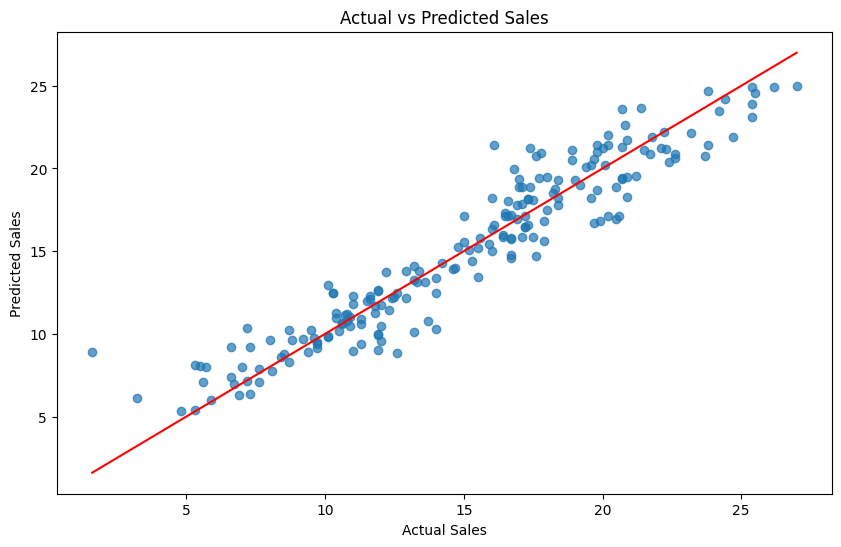

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'],y_pred, alpha=0.7)
plt.plot([df['Sales'].min(), df['Sales'].max()], [df['Sales'].min(), df['Sales'].max()], color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')

Questions:
5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?


In [110]:
sample = pd.DataFrame({
    'TV': [200],
    'Radio': [40],
    'Newspaper': [50]
})

y_pred_sm = lr.predict(sample)
print(f"Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: $",y_pred_sm)

Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: $ [19.81937816]


Questions:
6.	How does the performance of the linear regression model change when the dataset is normalized?

In [111]:
print(df_normalized.head())

  Campaign        TV     Radio  Newspaper     Sales
0    camp1  0.775786  0.762097   0.605981  0.807087
1    camp2  0.148123  0.792339   0.394019  0.346457
2    camp3  0.055800  0.925403   0.606860  0.409449
3    camp4  0.509976  0.832661   0.511873  0.586614
4    camp5  0.609063  0.217742   0.510994  0.641732


In [112]:
Xn = df_normalized[['TV','Radio','Newspaper']]
Yn = df_normalized[['Sales']]

lr_nrml = LinearRegression()
lr_nrml.fit(Xn,Yn)

LinearRegression()

In [113]:
y_pred_nm = lr_nrml.predict(Xn)

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true = y

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
print("Actual data: ")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

mae = mean_absolute_error(Yn, y_pred_nm)
mse = mean_squared_error(Yn, y_pred_nm)
rmse = np.sqrt(mse)
r2 = r2_score(Yn, y_pred_nm)
print("\nNormalized data: ")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Actual data: 
Mean Absolute Error (MAE): 1.2397
Mean Squared Error (MSE): 2.7230
Root Mean Squared Error (RMSE): 1.6502
R-squared (R2): 0.9029

Normalized data: 
Mean Absolute Error (MAE): 0.0488
Mean Squared Error (MSE): 0.0042
Root Mean Squared Error (RMSE): 0.0650
R-squared (R2): 0.9029


Questions:
7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?


In [124]:
lr_changed = LinearRegression()
Xc = df[['Radio','Newspaper']]
print(Xc.head())
print(y.head())

   Radio  Newspaper
0   37.8       69.2
1   39.3       45.1
2   45.9       69.3
3   41.3       58.5
4   10.8       58.4
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64


In [125]:
lr_changed.fit(Xc,y)

LinearRegression()

In [128]:
y_pred_c = lr_changed.predict(Xc)

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
print("Actual data: ")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

mae = mean_absolute_error(y_true, y_pred_c)
mse = mean_squared_error(y_true, y_pred_c)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred_c)
print("\nReduced data: ")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Actual data: 
Mean Absolute Error (MAE): 1.2397
Mean Squared Error (MSE): 2.7230
Root Mean Squared Error (RMSE): 1.6502
R-squared (R2): 0.9029

Reduced data: 
Mean Absolute Error (MAE): 4.2631
Mean Squared Error (MSE): 24.5784
Root Mean Squared Error (RMSE): 4.9577
R-squared (R2): 0.1237


SVM vs LR

In [131]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

Xcmp = df_normalized[['TV', 'Radio', 'Newspaper']]
ycmp = df_normalized['Sales']
X_train, X_test, y_train, y_test = train_test_split(Xcmp, ycmp, test_size=0.2, random_state=42)

In [134]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R-squared (R2): {r2_lr:.4f}")


svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R-squared (R2): {r2_svr:.4f}")

Linear Regression Evaluation:
Mean Absolute Error (MAE): 0.0419
Mean Squared Error (MSE): 0.0031
Root Mean Squared Error (RMSE): 0.0559
R-squared (R2): 0.8991

Support Vector Regression Evaluation:
Mean Absolute Error (MAE): 0.0537
Mean Squared Error (MSE): 0.0042
Root Mean Squared Error (RMSE): 0.0647
R-squared (R2): 0.8652


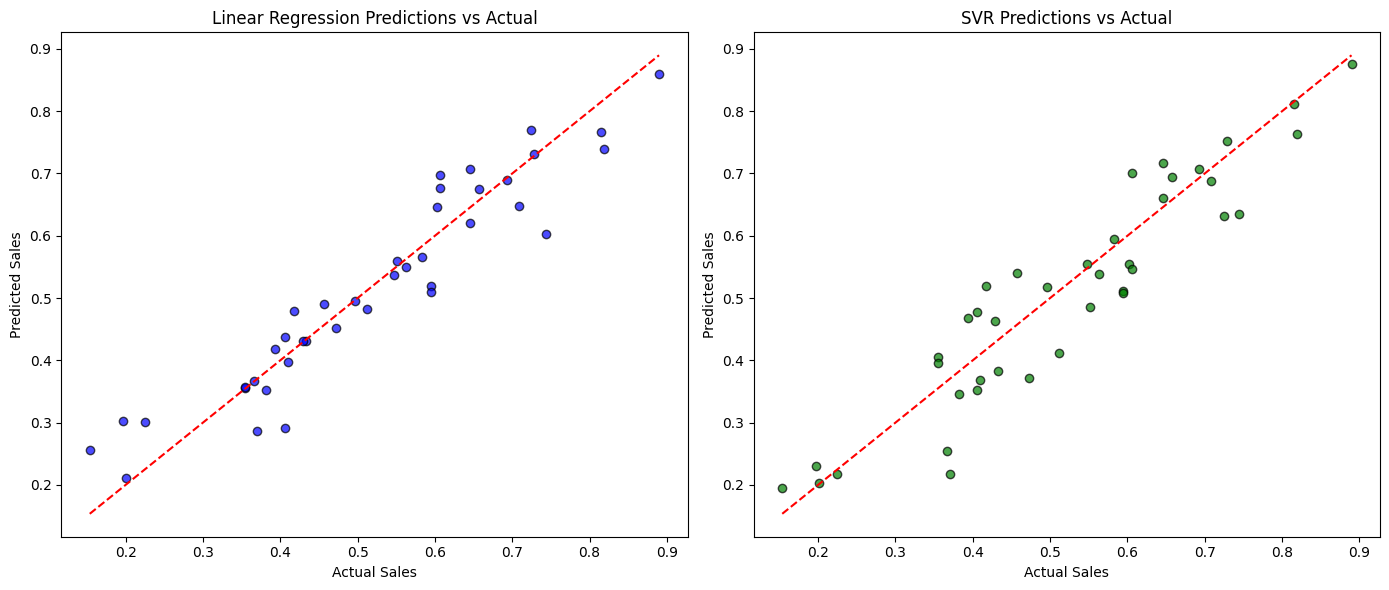

In [137]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')


plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_svr, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('SVR Predictions vs Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.tight_layout()
plt.show()

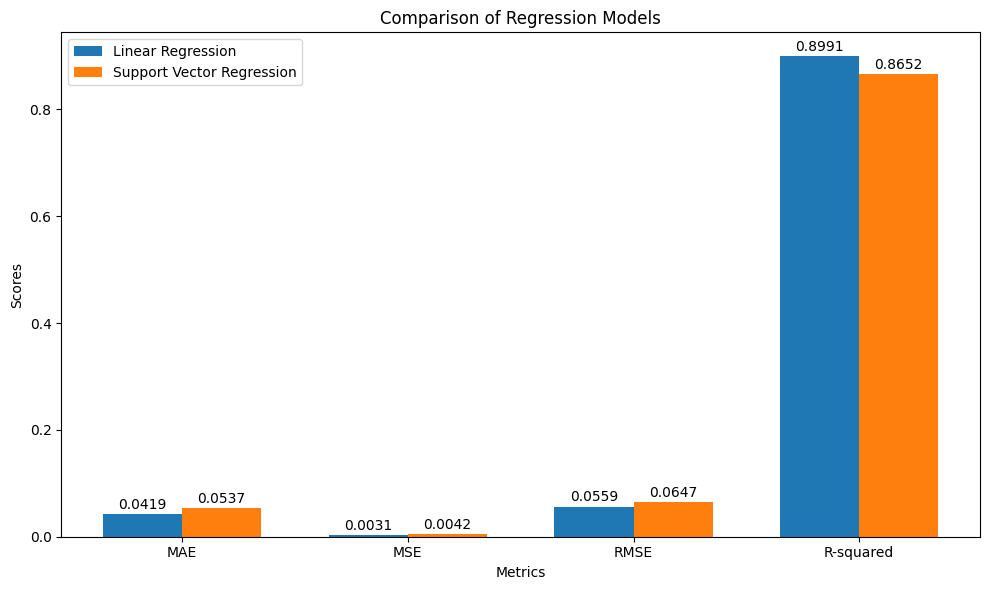

In [138]:
metrics = ['MAE', 'MSE', 'RMSE', 'R-squared']
lr_scores = [mae_lr, mse_lr, rmse_lr, r2_lr]
svr_scores = [mae_svr, mse_svr, rmse_svr, r2_svr]
# Bar width and positions
bar_width = 0.35
index = np.arange(len(metrics))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot bars for LR and SVR
plt.bar(index, lr_scores, bar_width, label='Linear Regression')
plt.bar(index + bar_width, svr_scores, bar_width, label='Support Vector Regression')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Regression Models')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# Add value labels on bars
for i, score in enumerate(lr_scores):
    plt.text(index[i], score + 0.01, f'{score:.4f}', ha='center')
for i, score in enumerate(svr_scores):
    plt.text(index[i] + bar_width, score + 0.01, f'{score:.4f}', ha='center')

# Show plot
plt.tight_layout()
plt.show()

Conclusion
If Linear Regression performs better than SVR in your case, it may be due to the simplicity of the problem.